In [12]:
# pdf to image
# ! pip install PyMuPDF
import fitz
import matplotlib.pyplot as plt
import os

file_dir = '//tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/'
file_list = os.listdir(file_dir)
print(file_list)


for file in file_list:    
    if file == 'Thumbs.db':
        continue
    doc = fitz.open(file_dir + file)
    for i, page in enumerate(doc):
        print(file, i, page)
        img = page.get_pixmap()
        img.save(f"//tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/{file.split('.pdf')[0]}_{i}.png")

['Thumbs.db', 'vmi_a_16.pdf', 'vmi_b_6.pdf']
vmi_a_16.pdf 0 page 0 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 1 page 1 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 2 page 2 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 3 page 3 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 4 page 4 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 5 page 5 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 6 page 6 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 7 page 7 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 8 page 8 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 9 page 9 of //tesser_nas

vmi_a_16.pdf 83 page 83 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_a_16.pdf 84 page 84 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_a_16.pdf
vmi_b_6.pdf 0 page 0 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_b_6.pdf
vmi_b_6.pdf 1 page 1 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_b_6.pdf
vmi_b_6.pdf 2 page 2 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_b_6.pdf
vmi_b_6.pdf 3 page 3 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_b_6.pdf
vmi_b_6.pdf 4 page 4 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_b_6.pdf
vmi_b_6.pdf 5 page 5 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_b_6.pdf
vmi_b_6.pdf 6 page 6 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_b_6.pdf
vmi_b_6.pdf 7 page 7 of //tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/vmi_

In [258]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import scipy.stats
from PIL import ImageFont, ImageDraw, Image
from scipy.stats import gaussian_kde
import scipy.stats as stats
import math


In [259]:
file_dir = '//tesser_nas1/product_resources/VMI-dataset/sample_trial_240219/'
file_list = os.listdir(file_dir)

In [260]:
# 파일에 따른 png 리스트 생성 / sort를 원활하게 하기 위함
what_remain_file = 0
whole_file_list = []

for ffff in file_list:
    if ffff.split('.')[-1] == 'png':
        file_num = ffff.split('_')[1]
        
        if what_remain_file == 0:
            globals()['test_' + str(file_num)] = []
        
        if what_remain_file != str(file_num) and what_remain_file != 0:
            whole_file_list.append(globals()['test_' + str(what_remain_file)])
            globals()['test_' + str(file_num)] = []
        
        globals()['test_' + str(file_num)].append(ffff)
        what_remain_file = str(file_num)
whole_file_list.append(globals()['test_' + str(what_remain_file)])

In [261]:
# 정규식을 통한 sorting 작업 (\d+는 숫자 하나 혹은 그 이상 연결된 뜻입니다)
for jkj in range(len(whole_file_list)):
    whole_file_list[jkj] = sorted(whole_file_list[jkj], key=lambda s: int(re.findall(r'\d+', s)[1]))

In [262]:
# 이름을 바꾸기
for jkj in range(len(whole_file_list)):
    for ijk in range(len(whole_file_list[jkj])):
        ppl = whole_file_list[jkj][ijk]
        if len(ppl.split('_')) == 5:
            print(' ')
            the_letter = 97
            ppl_num = ppl.split('_')[-1].split('.')[0]
        new_ppl = ppl.split('_')[0] + '_' + ppl.split('_')[1] + '_' + ppl.split('_')[2] + '_' + ppl_num + '_' + chr(the_letter) + '.png'
        the_letter += 1
        os.rename(file_dir + ppl, file_dir + new_ppl)
        whole_file_list[jkj][ijk] = new_ppl

In [265]:
# 이름 바꾸고 나서 다시 합치기
final_file_list = []
for wfl in whole_file_list:
    final_file_list += wfl 

In [266]:
final_file_list

['vmi_a_16_a_a.png',
 'vmi_a_16_a_b.png',
 'vmi_a_16_a_c.png',
 'vmi_a_16_a_d.png',
 'vmi_a_16_a_e.png',
 'vmi_a_16_b_a.png',
 'vmi_a_16_b_b.png',
 'vmi_a_16_b_c.png',
 'vmi_a_16_b_d.png',
 'vmi_a_16_b_e.png',
 'vmi_a_16_c_a.png',
 'vmi_a_16_c_b.png',
 'vmi_a_16_c_c.png',
 'vmi_a_16_c_d.png',
 'vmi_a_16_c_e.png',
 'vmi_a_16_c_f.png',
 'vmi_a_16_c_g.png',
 'vmi_a_16_c_h.png',
 'vmi_a_16_c_i.png',
 'vmi_a_16_d_a.png',
 'vmi_a_16_d_b.png',
 'vmi_a_16_d_c.png',
 'vmi_a_16_d_d.png',
 'vmi_a_16_d_e.png',
 'vmi_a_16_d_f.png',
 'vmi_a_16_e_a.png',
 'vmi_a_16_e_b.png',
 'vmi_a_16_e_c.png',
 'vmi_a_16_e_d.png',
 'vmi_a_16_e_e.png',
 'vmi_a_16_f_a.png',
 'vmi_a_16_f_b.png',
 'vmi_a_16_f_c.png',
 'vmi_a_16_f_d.png',
 'vmi_a_16_f_e.png',
 'vmi_a_16_f_f.png',
 'vmi_a_16_f_g.png',
 'vmi_a_16_f_h.png',
 'vmi_a_16_f_i.png',
 'vmi_a_16_g_a.png',
 'vmi_a_16_g_b.png',
 'vmi_a_16_g_c.png',
 'vmi_a_16_g_d.png',
 'vmi_a_16_g_e.png',
 'vmi_a_16_g_f.png',
 'vmi_a_16_g_g.png',
 'vmi_a_16_h_a.png',
 'vmi_a_16_h_

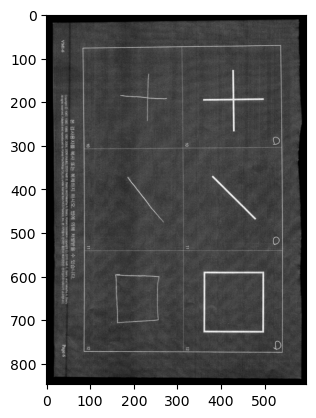

In [267]:
temp_read = 256 - cv2.imread(file_dir + final_file_list[88], cv2.IMREAD_GRAYSCALE)
plt.imshow(temp_read, cmap='gray')
plt.show()

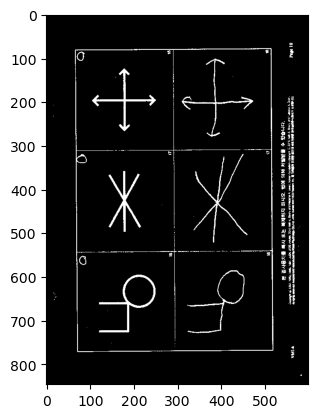

In [122]:
temp_threshold_110_200 = cv2.threshold(temp_read, 85, 256, cv2.THRESH_BINARY)[1]
plt.imshow(temp_threshold_110_200, cmap='gray')
plt.show()

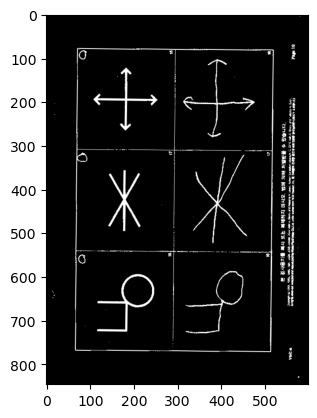

In [123]:
(h, w) = temp_threshold_110_200.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), -0.83, 1.0)
rotated_45 = cv2.warpAffine(temp_threshold_110_200, M, (w, h))
plt.imshow(rotated_45, cmap='gray')
plt.show()

In [5]:
np.square(temp_read/np.max(temp_read))

array([[1.52587891e-05, 1.52587891e-05, 1.52587891e-05, ...,
        1.52587891e-05, 1.52587891e-05, 1.52587891e-05],
       [1.52587891e-05, 1.52587891e-05, 1.52587891e-05, ...,
        1.52587891e-05, 1.52587891e-05, 1.52587891e-05],
       [1.52587891e-05, 1.52587891e-05, 1.52587891e-05, ...,
        1.52587891e-05, 1.52587891e-05, 6.10351562e-05],
       ...,
       [1.52587891e-05, 1.52587891e-05, 1.52587891e-05, ...,
        1.52587891e-05, 1.52587891e-05, 1.52587891e-05],
       [1.52587891e-05, 1.52587891e-05, 1.52587891e-05, ...,
        1.52587891e-05, 1.52587891e-05, 1.52587891e-05],
       [1.52587891e-05, 1.52587891e-05, 1.52587891e-05, ...,
        1.52587891e-05, 1.52587891e-05, 1.52587891e-05]])

In [99]:
# 일부분에 대한 pdf, 해당하는 normal distribution 그리는 함수
def pdf_and_normal(squared_c, j, axis_num, how_much__, how_much_range, normal_range, sigma, extract_max_num = 3, pdf_plot = False, normal_plot = False):
    axis__len = len(np.mean(squared_c, axis=axis_num))
    
    if j == (how_much__ - 1):
        # 기존 pdf
        np_list = np.mean(squared_c, axis=axis_num)[int(j*axis__len/how_much__):]
        range_list = list(range(int(j*axis__len/how_much__),axis__len))
        if pdf_plot:
            plt.plot(range_list,np_list/np.sum(np_list))
            
        # 정규분포 plot (mu = 확인 범위 내에서 가장 최대값인 곳)
        temp_np_list = np_list[len(np_list)//2-how_much_range:len(np_list)//2+how_much_range]
        list_of_maxima = np.where(np.max(temp_np_list) == np_list)
        where_is_max = int(np.mean(list_of_maxima)) # 간혹 최대치가 중복되어 여러개로 나올 수 있음 -> 평균화
        mu = range_list[where_is_max]
        if normal_plot:
            x = np.linspace(mu - normal_range*sigma, mu + normal_range*sigma, 200)
            final_stats_norm_pdf = stats.norm.pdf(x, mu, sigma)
            plt.plot(x, final_stats_norm_pdf/max(final_stats_norm_pdf))
            
        # 최대치 저장
        max_point_, max_pdf_list = mu,sorted(temp_np_list, reverse=True)[:extract_max_num]
    else:
        # 기존 plot
        np_list = np.mean(squared_c, axis=axis_num)[int(j*axis__len/how_much__):int((j+1)*axis__len/how_much__)]
        range_list = list(range(int(j*axis__len/how_much__),int((j+1)*axis__len/how_much__)))
        if pdf_plot:
            plt.plot(range_list, np_list/np.sum(np_list))
        
        # 정규분포 plot (mu = 확인 범위 내에서 가장 최대값인 곳)
        temp_np_list = np_list[len(np_list)//2-how_much_range:len(np_list)//2+how_much_range]
        list_of_maxima = np.where(np.max(temp_np_list) == np_list)
        where_is_max = int(np.mean(list_of_maxima)) # 간혹 최대치가 중복되어 여러개로 나올 수 있음 -> 평균화
        mu = range_list[where_is_max]
        if normal_plot:
            x = np.linspace(mu - normal_range*sigma, mu + normal_range*sigma, 200)
            final_stats_norm_pdf = stats.norm.pdf(x, mu, sigma)
            plt.plot(x, final_stats_norm_pdf/max(final_stats_norm_pdf))
        
        # 최대치 저장
        max_point_, max_pdf_list = mu, sorted(temp_np_list, reverse=True)[:extract_max_num]
    
    return max_point_, max_pdf_list

In [270]:
# 적합한 중심점 탐색 및 중심 부분 pdf 계산
def finding_the_box(cv2_images, theta_, bin_theta_, draw_plot = False, draw_norm = False, sigmoid_middle = 0.05, sigmoid_weight = 100
                    , plt_num = 241, how_much_0 = 3, how_much_1 = 4, how_much_range_from_mean = 50, sig_ = 20, normal_ran = 5
                    , extracting_max_num = 3):
    
    (h, w) = cv2_images.shape[:2]
    (cX, cY) = (w // 2, h // 2)
        
    M = cv2.getRotationMatrix2D((cX, cY), theta/bin_theta, 1.0)
    cv2_images = cv2.warpAffine(cv2_images, M, (w, h))    
    
    # 시그모이드 함수 투여
    squared_color = 1/(1 + np.exp((-sigmoid_weight)*(cv2_images/np.max(cv2_images) - sigmoid_middle)))
    
    if draw_plot:
        plt.figure(figsize = (11,5))
        
    # plt_num, how_much_0, how_much_1는 각각 plot 숫자, x축을 몇개로 나눌것인지, y축을 몇개로 나눌것인지    
    # how_much_range_from_mean는 정규분포의 평균을 정하기 위해 중심으로부터 확인 범위
    # sig_, normal_ran는 각각 정규분포 표준편차, plot에 나타내는 범위
    np_1_mu, np_1_pdf, np_0_mu, np_0_pdf = [], [], [], []
    for jj in range(how_much_1):
        if draw_plot:
            plt.subplot(plt_num)
            plt_num += 1
        wow_1, wow_2 = pdf_and_normal(squared_color, jj, axis_num = 1, how_much__ = how_much_1, how_much_range = how_much_range_from_mean
                       , normal_range = normal_ran, sigma = sig_, extract_max_num = extracting_max_num
                              , pdf_plot = draw_plot, normal_plot = draw_norm)
        np_1_mu.append(wow_1)
        np_1_pdf.append(wow_2)
    
    np_1_mu, np_1_pdf = np.array(np_1_mu), np.array(np_1_pdf)
    
    for jj in range(how_much_0):
        if draw_plot:
            plt.subplot(plt_num)
            plt_num += 1
        wow_1, wow_2 = pdf_and_normal(squared_color, jj, axis_num = 0, how_much__ = how_much_0, how_much_range = how_much_range_from_mean
                       , normal_range = normal_ran, sigma = sig_, extract_max_num = extracting_max_num
                              , pdf_plot = draw_plot, normal_plot = draw_norm)
        np_0_mu.append(wow_1)
        np_0_pdf.append(wow_2)
        
    np_0_mu, np_0_pdf = np.array(np_0_mu), np.array(np_0_pdf)
    
    return np_1_mu, np_1_pdf, np_0_mu, np_0_pdf

In [273]:
# 적합한 회전 각도 찾기 및 부분 그림 추출
for what_index, what_file in enumerate(final_file_list):
    # png 아니면 continue
    if what_file.split('.')[-1] != 'png':
        continue
    #if what_index <= 87:
    #    continue
    
    # 적합한 회전 각도 찾기
    start_theta, finish_theta = -2, 2
    bin_theta = 100
    true_max_theta, true_max_pdf = 0, 0
    
    for theta in range(start_theta*bin_theta, finish_theta*bin_theta):
        temp_read = 256 - cv2.imread(file_dir + final_file_list[what_index], cv2.IMREAD_GRAYSCALE)
        bw_threshold, value_above_threshold = 85, 256 # threshold를 조절 / bw_threshold 넘은 값들은 value_above_threshold만큼 주어라
        temp_read = cv2.threshold(temp_read, bw_threshold, value_above_threshold, cv2.THRESH_BINARY)[1]
        
        
        return_box = finding_the_box(cv2_images = temp_read,theta_ = theta,bin_theta_ = bin_theta, draw_plot = False
                                     , draw_norm = False, sigmoid_middle = 0.05, sigmoid_weight = 100, plt_num = 241
                                     , how_much_0 = 3, how_much_1 = 4, how_much_range_from_mean = 50, sig_ = 20
                                     , normal_ran = 5, extracting_max_num = 3)
        
        test_max_pdf = np.median(return_box[1]) + np.median(return_box[3])
        if true_max_pdf < test_max_pdf:
            true_max_theta, true_max_pdf, true_return_box = theta/bin_theta, test_max_pdf, return_box
    
    print(true_max_theta, true_return_box[0], true_return_box[2])
    
    # 찾은 회전 각도에 맞추기
    temp_read = 256 - cv2.imread(file_dir + final_file_list[what_index], cv2.IMREAD_GRAYSCALE)
    (h, w) = temp_read.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    
    # 부분 그림 추출 및 저장
    M = cv2.getRotationMatrix2D((cX, cY), true_max_theta, 1.0)
    rotated_45 = cv2.warpAffine(temp_read, M, (w, h))
    print(what_index)
    for kk in range(1,4):
        cv2.imwrite('//tesser_nas1/product_resources/VMI-dataset/seperate_trial_240220/'+what_file.split('.')[0]+'_'+str(kk)+'.jpg'
                    ,rotated_45[true_return_box[0][kk]-30:true_return_box[0][kk],true_return_box[2][-1] - 30:true_return_box[2][-1]])

-0.34 [ 94 311 533 752] [ 59 282 505]
0
-0.21 [ 85 307 533 755] [ 64 290 515]
1
-0.28 [ 85 307 532 754] [ 63 287 513]
2
-0.15 [ 95 313 536 755] [ 66 287 509]
3
-0.38 [ 85 269 397 492] [111 384 699]
4
0.38 [ 97 319 547 770] [ 49 277 505]
5
-0.24 [ 96 320 549 774] [ 58 286 514]
6
0.2 [ 90 316 545 770] [ 53 282 511]
7
0.2 [ 92 320 546 770] [ 58 286 514]
8
0.22 [109 271 404 474] [ 91 421 656]
9
-0.48 [ 87 308 535 759] [ 61 286 511]
10
-0.19 [ 90 309 532 752] [ 60 280 501]
11
1.43 [ 83 308 536 762] [ 71 296 523]
12
1.26 [ 85 308 536 759] [ 67 291 516]
13
1.25 [ 78 303 533 759] [ 77 302 529]
14
0.41 [ 85 307 533 757] [ 64 286 511]
15
-0.78 [ 89 311 538 762] [ 80 302 527]
16
-0.83 [ 92 313 538 761] [ 78 299 522]
17
-0.12 [ 98 271 338 472] [ 98 447 656]
18
0.37 [ 92 314 541 765] [ 49 277 505]
19
0.25 [ 93 316 543 766] [ 56 282 507]
20
0.57 [ 92 315 542 765] [ 54 279 506]
21
0.22 [ 96 319 545 769] [ 54 280 506]
22
0.22 [ 95 317 542 764] [ 63 288 512]
23
0.14 [ 83 251 404 475] [ 91 374 662]
24
0

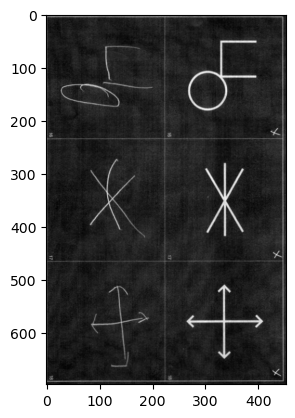

In [268]:
temp_read = 256 - cv2.imread(file_dir + final_file_list[109], cv2.IMREAD_GRAYSCALE)
(h, w) = temp_read.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), true_max_theta, 1.0)
rotated_45 = cv2.warpAffine(temp_read, M, (w, h))
plt.imshow(rotated_45[true_return_box[0][0]:true_return_box[0][-1],true_return_box[2][0]:true_return_box[2][-1]], cmap='gray')
plt.show()

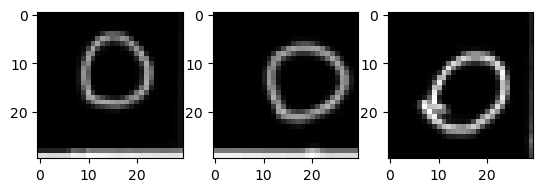

In [83]:
plt.subplot(131)
plt.imshow(rotated_45[true_return_box[0][1]-30:true_return_box[0][1],true_return_box[2][-1] - 30:true_return_box[2][-1]], cmap='gray')

plt.subplot(132)
plt.imshow(rotated_45[true_return_box[0][2]-30:true_return_box[0][2],true_return_box[2][-1] - 30:true_return_box[2][-1]], cmap='gray')

plt.subplot(133)
plt.imshow(rotated_45[true_return_box[0][3]-30:true_return_box[0][3],true_return_box[2][-1] - 30:true_return_box[2][-1]], cmap='gray')

plt.show()

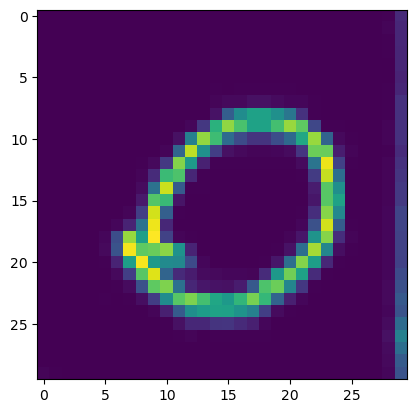

In [81]:
plt.imshow(rotated_45[true_return_box[0][kk]-30:true_return_box[0][kk],true_return_box[2][-1] - 30:true_return_box[2][-1]])
plt.show()